In [31]:
import psycopg2
conn = psycopg2.connect(
    host='localhost',
    database='postgres',
    user='postgres',
    password='1111'
)
cur = conn.cursor()

In [2]:
cur.execute('select * from user_info')

In [6]:
cur.fetchone()

('chris', '박기원', '1234567891234', 'KT', '01000000000')

In [ ]:
query = "insert into user_info values('%s','%s','%s','%s','%s');"
conn.execute(query,('id11','pw11','name11','email11','phone11'))

In [8]:
import pandas as pd
cur.execute('select * from user_info')
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])
df

,user_id,user_name,jumin_no,tel_co,tel_no
0,jimin,박지민,9510131234567,SK,01011111111
1,jungkuk,전정국,9709011234567,KT,01022222222
2,sugar,민윤기,9309011234567,LG,01033333333
3,chris,박기원,1234567891234,KT,01000000000
4,chris3,박기원,1234567891234,KT,01000000000
5,chris2,김철수,1234567891234,KT,01000000000


In [9]:
cur.description

(Column(name='user_id', type_code=1043),
 Column(name='user_name', type_code=1043),
 Column(name='jumin_no', type_code=1042),
 Column(name='tel_co', type_code=1042),
 Column(name='tel_no', type_code=1042))

In [24]:
conn.rollback()

In [20]:
df = pd.read_sql_query('select * from user_info', conn)
df

C:\Users\bagg8\AppData\Local\Temp\ipykernel_63472\1388896473.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('select * from user_info', conn)


,user_id,user_name,jumin_no,tel_co,tel_no
0,jimin,박지민,9510131234567,SK,01011111111
1,jungkuk,전정국,9709011234567,KT,01022222222
2,sugar,민윤기,9309011234567,LG,01033333333
3,chris,박기원,1234567891234,KT,01000000000
4,chris3,박기원,1234567891234,KT,01000000000
5,chris2,김철수,1234567891234,KT,01000000000


In [ ]:
df = pd.read_sql("""select * 
from user_info""", conn)
df

C:\Users\bagg8\AppData\Local\Temp\ipykernel_63472\1480934652.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('select * ' \


,user_id,user_name,jumin_no,tel_co,tel_no
0,jimin,박지민,9510131234567,SK,01011111111
1,jungkuk,전정국,9709011234567,KT,01022222222
2,sugar,민윤기,9309011234567,LG,01033333333
3,chris,박기원,1234567891234,KT,01000000000
4,chris3,박기원,1234567891234,KT,01000000000
5,chris2,김철수,1234567891234,KT,01000000000


In [3]:
conn.close()

NameError: name 'conn' is not defined

In [52]:
conn.rollback()

C:\Users\bagg8\AppData\Local\Temp\ipykernel_63472\2502060265.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""select pr.raw_weight, mc.code_desc from fms.master_code mc
C:\Users\bagg8\AppData\Local\Temp\ipykernel_63472\2502060265.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='code_desc', y='raw_weight', data=df, palette='Set2')


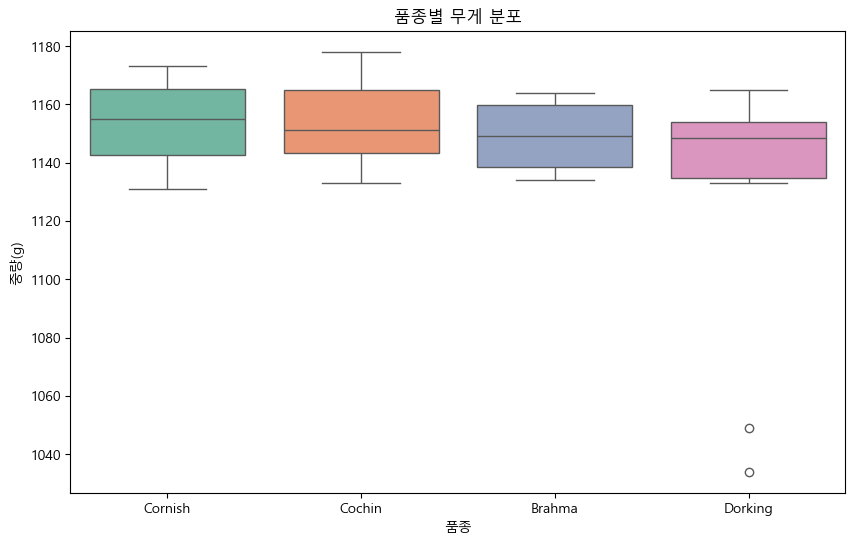

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# SQL 쿼리 작성
df = pd.read_sql("""select pr.raw_weight, mc.code_desc from fms.master_code mc 
                 join fms.chick_info ci on mc.code = ci.breeds 
                 join fms.prod_result pr on pr.chick_no = ci.chick_no
                 where mc.column_nm = 'breeds'""", conn)

# 데이터 전처리
# coerce : 숫자로 바꿀 수 없는 값이 나오면 에러를 내지 말고 NaN으로 바꿔라
df["raw_weight"] = pd.to_numeric(df["raw_weight"], errors="coerce")
df = df.dropna(subset=["raw_weight", "code_desc"])

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False

# 박스플롯 그리기
plt.figure(figsize=(10,6))
sns.boxplot(x='code_desc', y='raw_weight', data=df, palette='Set2')
plt.title('품종별 무게 분포')
plt.xlabel('품종')
plt.ylabel('중량(g)')
plt.show()

In [55]:
conn.rollback()

C:\Users\bagg8\AppData\Local\Temp\ipykernel_63472\3497425600.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""SELECT hc.check_date, ec.temp, AVG(hc.body_temp) AS avg_body_temp


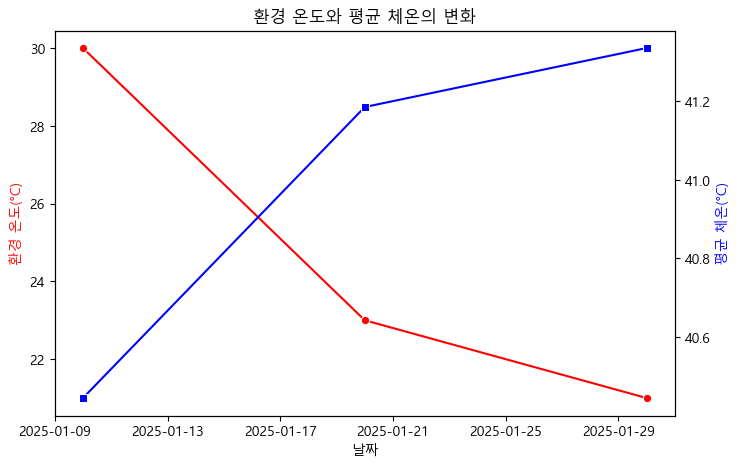

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# SQL 쿼리 작성
df = pd.read_sql("""SELECT hc.check_date, ec.temp, AVG(hc.body_temp) AS avg_body_temp
                    FROM fms.env_cond ec
                    JOIN fms.health_cond hc
                    ON ec.date = hc.check_date
                    GROUP BY hc.check_date, ec.temp
                    ORDER BY hc.check_date;
                    """, conn)


# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False

# 선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8,5))
sns.lineplot(data=df, x='check_date', y='temp', ax=ax1, color='red', marker='o')
ax1.set_ylabel('환경 온도(°C)', color='red')
ax2 = ax1.twinx()
sns.lineplot(data=df, x='check_date', y='avg_body_temp', ax=ax2, color='blue', marker='s')
ax2.set_ylabel('평균 체온(°C)', color='blue')

ax1.set_title('환경 온도와 평균 체온의 변화')
ax1.set_xlabel('날짜')
plt.show()

In [72]:
conn.rollback()

In [63]:
%pip install scikit-learn

  Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -------------------- ------------------- 4.2/8.0 MB 23.6 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 21.2 MB/s  0:00:00
Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl (36.3 MB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\bagg8\AppData\Local\Temp\ipykernel_63472\96314019.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""SELECT pr.raw_weight, hc.feed_intake


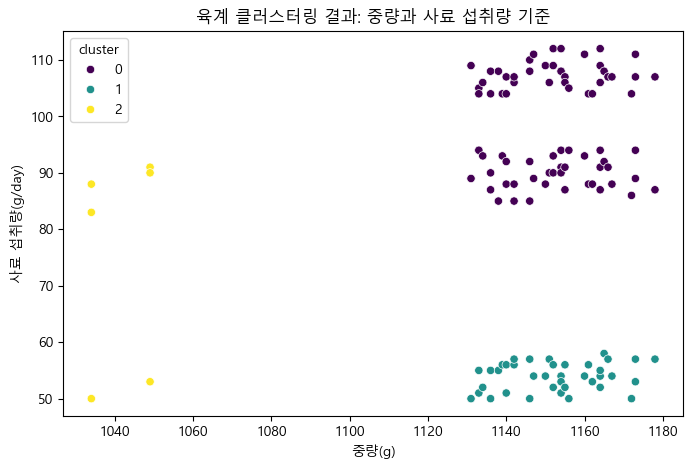

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.cluster import KMeans

# SQL 쿼리 작성
df = pd.read_sql("""SELECT pr.raw_weight, hc.feed_intake
                    FROM fms.prod_result pr
                    JOIN fms.health_cond hc
                    ON pr.chick_no = hc.chick_no
                    ORDER BY pr.raw_weight;
                    """, conn)


# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False

# ✅ 클러스터링 (3개 그룹)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df[["raw_weight", "feed_intake"]])


# 산점도 그리기
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=df, x='raw_weight', y='feed_intake', ax=ax, hue='cluster', palette="viridis")
ax.set_title('육계 클러스터링 결과: 중량과 사료 섭취량 기준')
ax.set_xlabel('중량(g)')
ax.set_ylabel('사료 섭취량(g/day)')
plt.show()

C:\Users\bagg8\AppData\Local\Temp\ipykernel_63472\736229749.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""SELECT avg(raw_weight) as avg_weight, prod_date,


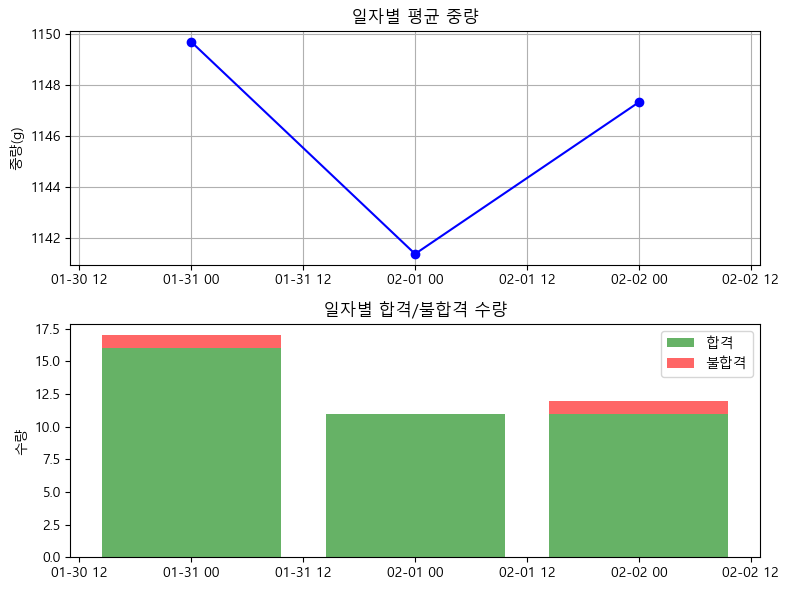

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

df = pd.read_sql("""SELECT avg(raw_weight) as avg_weight, prod_date,
                 sum(case
                    when pass_fail='P' then 1 else 0 end) as pass_count,
                 sum(case
                    when pass_fail='F' then 1 else 0 end) as fail_count
                 from fms.prod_result
                 group by prod_date
                 ORDER BY prod_date;""",conn)

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False

# 그래프 그리기 (막대그래프 + 선그래프)
# 2행 1열짜리 그래프 영역 생성
# ✅ 1) 위: 일자별 평균 중량 (Line plot)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
ax1.plot(df['prod_date'], df['avg_weight'], marker='o', color='blue')
ax1.set_title('일자별 평균 중량')
ax1.set_ylabel('중량(g)')
ax1.grid(True)
# x축 라벨 표시 
ax1.tick_params(axis="x", labelbottom=True)

# ✅ 2) 아래: 일자별 합격/불합격 수량 (Stacked Bar)
ax2.bar(x = df['prod_date'], height = df['pass_count'], label='합격', color='green', alpha=0.6)
ax2.bar(x = df['prod_date'], height = df['fail_count'], bottom=df['pass_count'], label='불합격', color='red', alpha=0.6)
ax2.set_title('일자별 합격/불합격 수량')
ax2.set_ylabel('수량')
ax2.legend()
plt.tight_layout()
plt.show()